# 1D linear regression plots

In [21]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) #for reproducibility

Let's generate some fixed values for $x$.

In [22]:
nsamples=20
xmax = 100
step = xmax // nsamples
x = np.arange(0,xmax,step)
x

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

For the sake of the argument, we generate two random values for $\beta$.

In [23]:
beta = np.random.uniform(0,20, size=2)
print(", ".join([f"beta_{it} = "+str(beta[it]) for it in range(2)]))

beta_0 = 7.49080237694725, beta_1 = 19.01428612819832


We now also need our random variable $\varepsilon$. We use the `randn` method which returns samples from a normal distribution $\mathcal{N}(0,1)$.

In [24]:
sigma_true = 50
epsilon = np.random.randn(nsamples)*sigma_true
epsilon

array([ 32.38442691,  76.15149282, -11.70766874, -11.70684785,
        78.96064078,  38.37173646, -23.4737193 ,  27.12800218,
       -23.17088464, -23.28648768,  12.09811358, -95.66401223,
       -86.24589163, -28.11437646, -50.64155602,  15.71236663,
       -45.40120378, -70.61518507,  73.28243845, -11.28881502])

Finally, we build the data generating process and calculate our observations $y$.

In [25]:
y = beta[0] + beta[1]*x + epsilon
y

array([  39.87522928,  178.71372584,  185.92599492,  280.99824645,
        466.73716572,  521.21969204,  554.44566693,  700.11881904,
        744.89136286,  839.84719047,  970.30322237,  957.61252719,
       1062.10207844, 1215.30502425, 1287.84927533, 1449.27462862,
       1483.23248886, 1553.08993821, 1792.05899236, 1802.55916953])

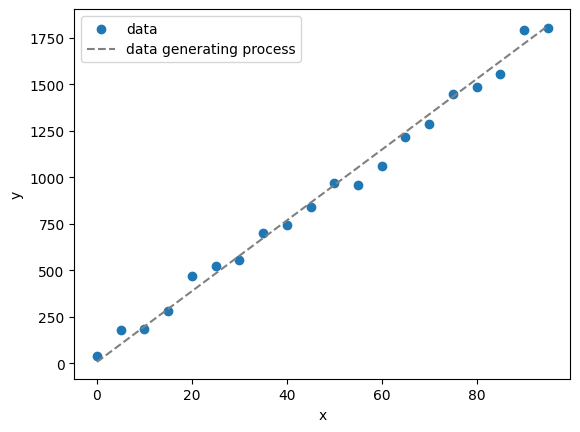

In [26]:
fig, ax = plt.subplots(1,1)
ax.scatter(x,y,label="data")
ax.plot([0,x[-1]],[beta[0],beta[0]+beta[1]*x[-1]],'--',label="data generating process",color="grey")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("1n_regression.pdf")
fig.savefig("1n_regression.svg")

## Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$

Use the formulae from the lecture to calculate the two estimators $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [27]:
bar_x = np.mean(x)
bar_y = np.mean(y)
# (x - bar_x).sum()
(x - bar_x) * (y - bar_y)

array([41060.55765105, 30837.75758414, 26939.32601299, 20257.56770321,
       12033.19854604,  8619.48742266,  6122.59121267,  2552.36503616,
        1195.62494304,   161.15207867,   164.98800107,   399.78378944,
        1972.42570634,  5442.44754046,  8629.67820146, 14986.58168386,
       18815.04517493, 24329.32186017, 37729.41624307, 42666.9295108 ])

In [28]:


beta_1_hat = ((x - bar_x) * (y - bar_y)).sum() / ((x - bar_x)**2).sum()
beta_0_hat = bar_y - beta_1_hat * bar_x

print(f"beta_0_hat = {beta_0_hat} and beta_1_hat = {beta_1_hat}")

beta_0_hat = 33.118747929378515 and beta_1_hat = 18.34082682118705


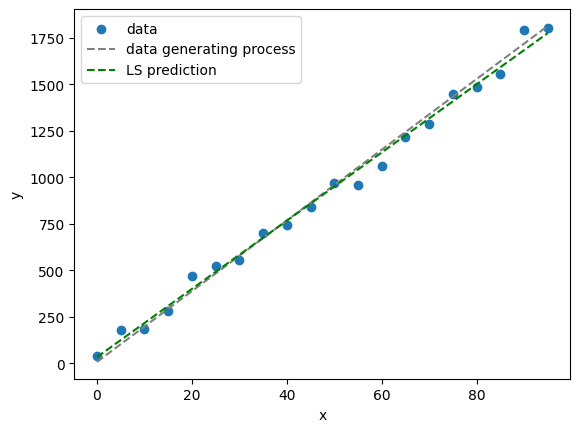

In [29]:
fig, ax = plt.subplots(1,1)
ax.scatter(x,y,label="data")
ax.plot([0,x[-1]],[beta[0],beta[0]+beta[1]*x[-1]],'--',label="data generating process",color="grey")
ax.plot([0,x[-1]],[beta_0_hat,beta_0_hat+beta_1_hat*x[-1]],'--',label="LS prediction",color="green")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("1n_regression_hat.pdf")
fig.savefig("1n_regression_hat.svg")

## variances of $\hat{\beta}_0$ and $\hat{\beta}_1$

Use the formulae from the lecture to calculate the two estimators $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [33]:
var_sigma = ((y - bar_y)**2).sum() / (len(y) - 2)
var_sigma**0.5

np.float64(559.4712480988835)

In [34]:

beta_0_var = var_sigma**2 / ((x - bar_x)**2).sum()
beta_1_var = var_sigma**2 * (1/len(y) + bar_x**2 / ((x - bar_x)**2).sum())

print(f"beta_0_hat = {beta_0_hat} +/- {np.sqrt(beta_0_var)}, true value beta_0 = {beta[0]}")
print(f"beta_1_hat = {beta_1_hat} +/- {np.sqrt(beta_1_var)}, true value beta_1 = {beta[1]}")

beta_0_hat = 33.118747929378515 +/- 2427.5865244612037, true value beta_0 = 7.49080237694725
beta_1_hat = 18.34082682118705 +/- 134889.51749650386, true value beta_1 = 19.01428612819832


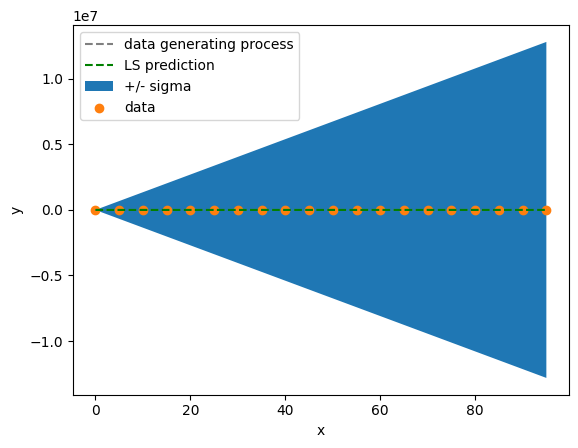

In [35]:
fig, ax = plt.subplots(1,1)
ax.plot([0,x[-1]],[beta[0],beta[0]+beta[1]*x[-1]],'--',label="data generating process",color="grey")
ax.plot([0,x[-1]],[beta_0_hat,beta_0_hat+beta_1_hat*x[-1]],'--',label="LS prediction",color="green")

upper = (beta_0_hat+np.sqrt(beta_0_var))+(beta_1_hat+np.sqrt(beta_1_var))*x
lower = (beta_0_hat-np.sqrt(beta_0_var))+(beta_1_hat-np.sqrt(beta_1_var))*x

ax.fill_between(x,upper,lower,label="+/- sigma")
ax.scatter(x,y,label="data")

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("1n_regression_hat_pm_std.pdf")
fig.savefig("1n_regression_hat_pm_std.svg")